# **Exercise 1: Harris Corner Detection**

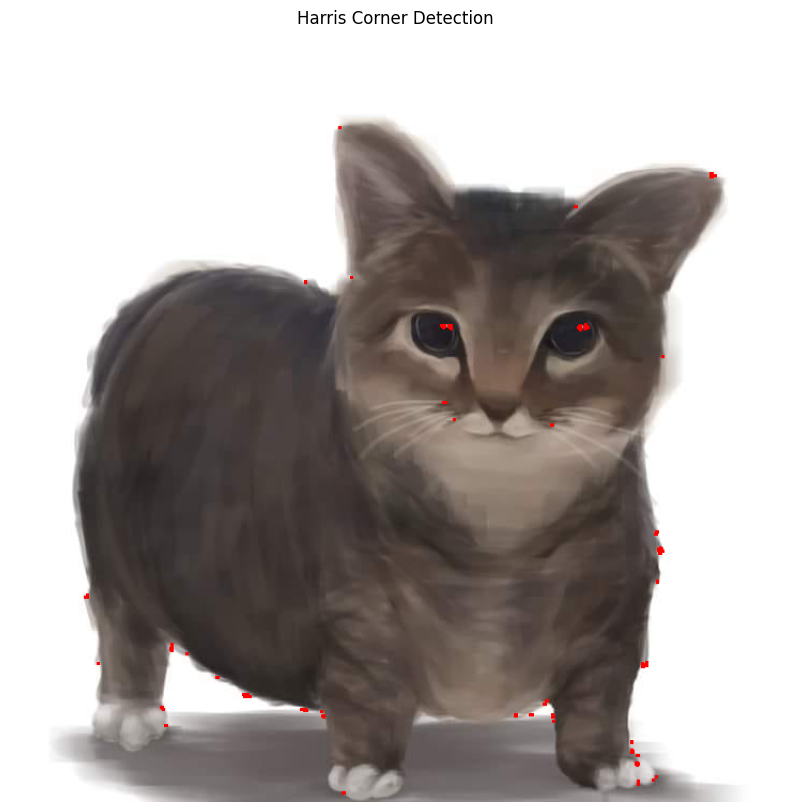

In [1]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image_path = 'sample.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert grayscale image to float32 type as required by Harris Corner function
gray_image = np.float32(gray_image)

# Apply the Harris Corner Detection method
# Parameters: blockSize, ksize, and k are tuned for better results
dst = cv2.cornerHarris(src=gray_image, blockSize=2, ksize=3, k=0.04)

# Dilate the corner points to enhance them
dst = cv2.dilate(dst, None)

# Set threshold for detecting strong corners
image[dst > 0.01 * dst.max()] = [0, 0, 255]  # Mark corners in red

# Convert the image from BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()


# ***Exercise 2: HOG (Histogram of Oriented Gradients) Feature Extraction***

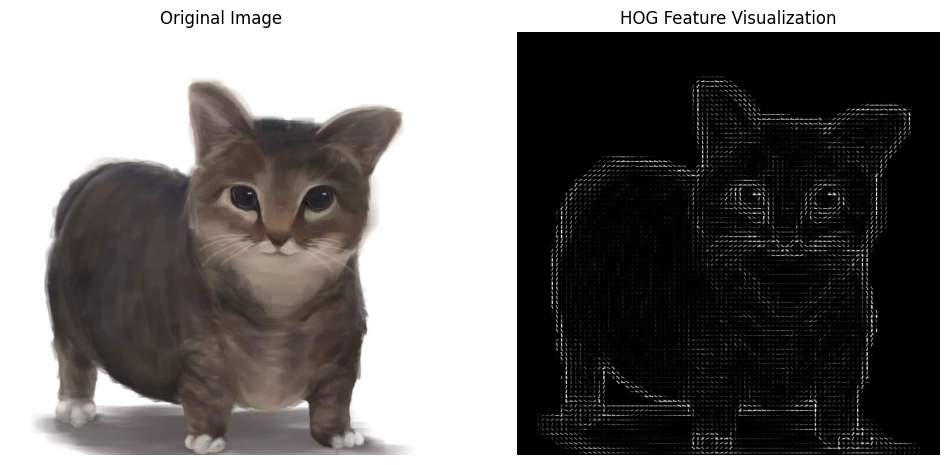

In [2]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load the image (replace with your image path if needed)
image_path = 'sample.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the HOG descriptor to extract features
# Parameters: pixels_per_cell, cells_per_block, orientations for customizing HOG
hog_features, hog_image = hog(
    gray_image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    feature_vector=False
)

# Enhance the visualization of the HOG image for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the original image and the HOG visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Feature Visualization')
plt.axis('off')

plt.show()


# **Exercise 3: FAST (Features from Accelerated Segment Test) Keypoint Detection**

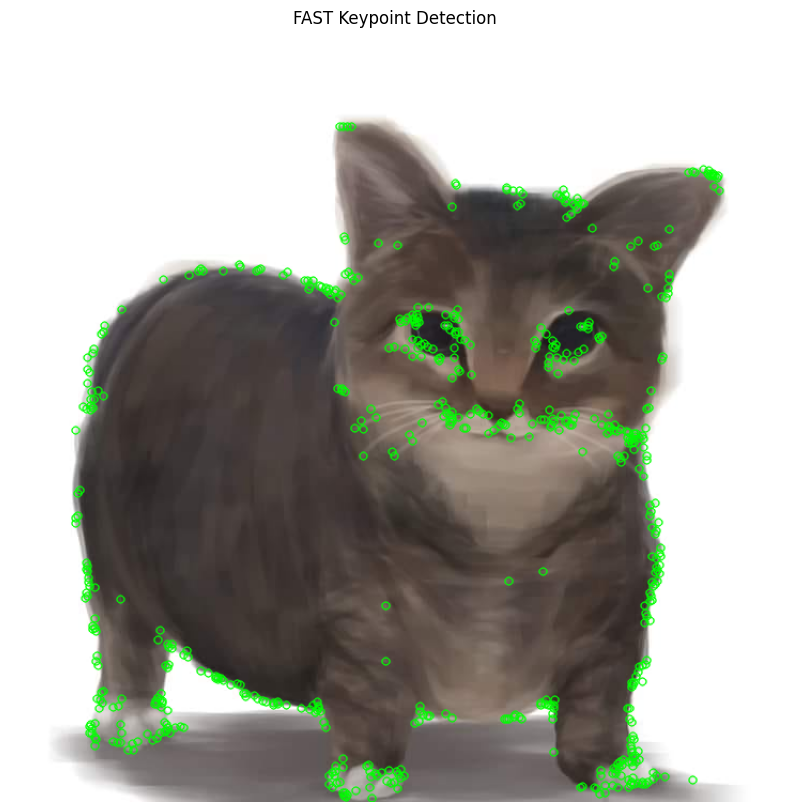

In [4]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Load the image (replace with your image path if needed)
image_path = 'sample.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize the FAST detector
fast = cv2.FastFeatureDetector_create()

# Detect keypoints using FAST
keypoints = fast.detect(gray_image, None)

# Draw the keypoints on the original image
image_with_keypoints = cv2.drawKeypoints(
    image, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Convert the image from BGR to RGB for displaying with Matplotlib
image_with_keypoints_rgb = cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image_with_keypoints_rgb)
plt.title('FAST Keypoint Detection')
plt.axis('off')
plt.show()


# **Exercise 4: Feature Matching using ORB and FLANN**

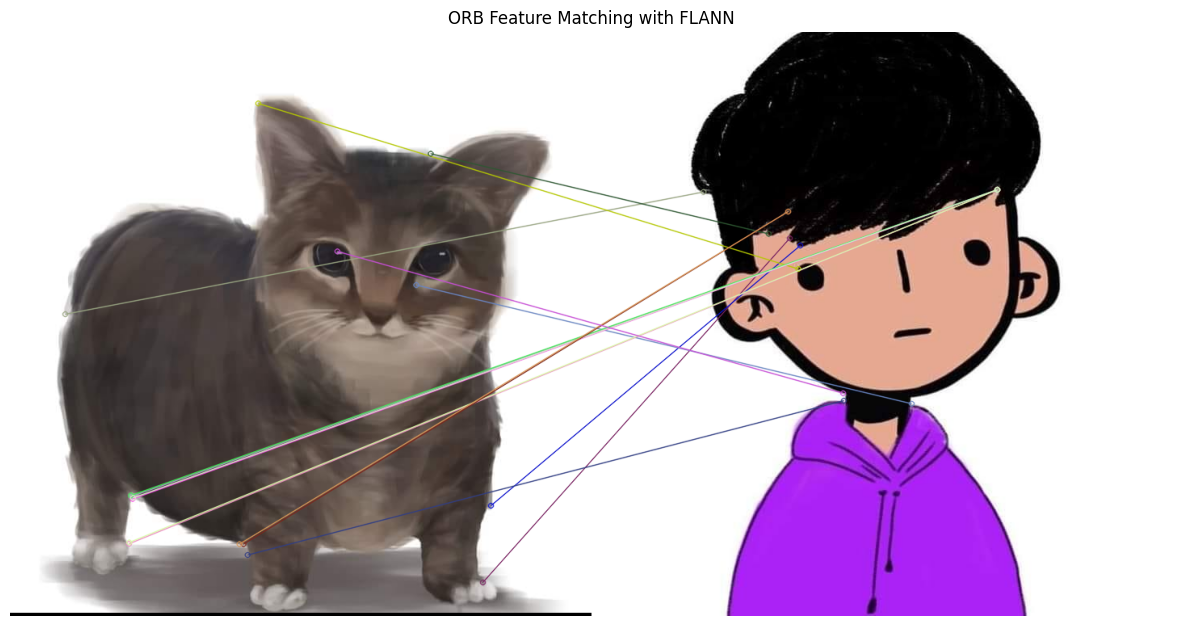

In [5]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Load the two images (replace with paths to your images)
image_path1 = 'sample.jpg'  # Replace with the path to the first image
image_path2 = 'sample2.jpg'  # Replace with the path to the second image
image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

# Convert the images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

# Set up FLANN-based matcher with ORB's specific parameters
index_params = dict(algorithm=6,  # FLANN_INDEX_LSH for ORB
                    table_number=6,  # Number of hash tables
                    key_size=12,     # Size of the key
                    multi_probe_level=1)  # Number of probes per table
search_params = dict(checks=50)  # Number of times to re-check if matches are found

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors using KNN and apply ratio test to filter good matches
matches = flann.knnMatch(descriptors1, descriptors2, k=2)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Ratio test to select good matches
        good_matches.append(m)

# Draw matches on the images
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert BGR to RGB for displaying with Matplotlib
matched_image_rgb = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)

# Display the matched features
plt.figure(figsize=(15, 10))
plt.imshow(matched_image_rgb)
plt.title('ORB Feature Matching with FLANN')
plt.axis('off')
plt.show()


# **Exercise 5: Image Segmentation using Watershed Algorithm**

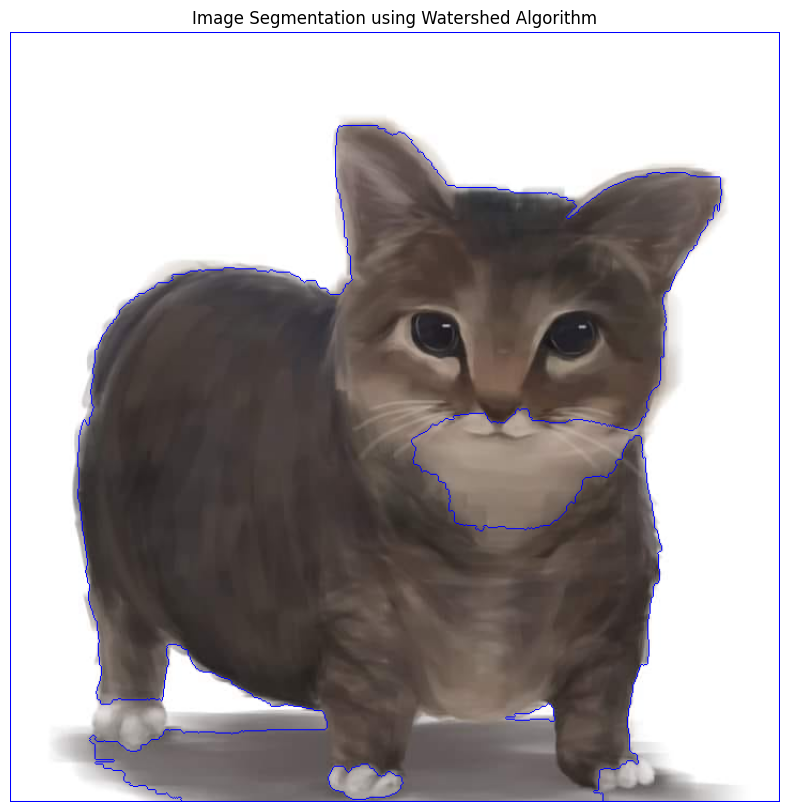

In [6]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace with your image path if needed)
image_path = 'sample.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to get a binary image
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove noise using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Identify sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Identify sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Identify unknown region (area that is neither background nor foreground)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all markers to ensure background is not 0
markers = markers + 1

# Mark the unknown region as 0
markers[unknown == 255] = 0

# Apply the Watershed algorithm
markers = cv2.watershed(image, markers)

# Mark boundaries in the original image
image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Convert BGR to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the segmented regions
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title('Image Segmentation using Watershed Algorithm')
plt.axis('off')
plt.show()
